In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [4]:
directory = "./results/mdi_local.real_x_sim_y.diabetes-regression.linear-model/diabetes-reg-linear/varying_heritability/"
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    # check if seed folder exists
    if os.path.exists(os.path.join(directory, f"seed{seed}/results.csv")):
        df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
        combined_df = pd.concat([combined_df, df], ignore_index=True)

In [5]:
combined_df

,rep,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,include_raw,fit_on,model,fi,train_size,test_size,num_features,data_split_seed,rf_plus_fit_time,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_train_67,sample_train_68,sample_train_69,sample_train_70,sample_train_71,sample_train_72,sample_train_73,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,fi_time,train_AUROC,train_AUPRC,train_F1,test_AUROC,test_AUPRC,test_F1,split_seed
0,0,0.1,0.1,100,1,0.33,42,NaN,NaN,RF,Kernel_SHAP_RF_plus,296,146,10,1,12.777327,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119,18,9,58,99,73,97,128,122,1622.727949,0.577838,0.635698,0.000000,0.646667,0.677123,0.000000,1
1,0,0.1,0.1,100,1,0.33,42,NaN,NaN,RF,LFI_evaluate_on_all_RF_plus,296,146,10,1,0.000003,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119,18,9,58,99,73,97,128,122,11.966596,0.495676,0.612882,0.130066,0.451111,0.581673,0.013889,1
2,0,0.1,0.1,100,1,0.33,42,NaN,NaN,RF,LFI_evaluate_on_oob_RF_plus,296,146,10,1,11.966596,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119,18,9,58,99,73,97,128,122,12.777327,0.474595,0.598768,0.149544,0.451111,0.581673,0.013889,1
3,0,0.1,0.1,100,1,0.33,42,NaN,oob,RF,LFI_fit_on_OOB_RF,296,146,10,1,23.028107,274,155,84,82,261,9,42,277,282,92,148,211,60,218,262,46,45,236,228,132,143,167,152,93,113,5,238,251,170,186,193,33,222,216,197,73,182,119,285,202,204,179,177,111,59,226,25,77,6,175,164,140,30,22,245,24,56,144,124,97,63,17,215,219,183,114,76,284,66,178,154,75,19,108,69,30,39,2,124,10,68,51,71,77,102,80,76,142,127,95,70,93,67,0,105,82,136,40,54,28,74,119

In [6]:
# print col names of combined_df
print(list(combined_df.columns))

['rep', 'heritability', 'heritability_name', 'n_estimators', 'min_samples_leaf', 'max_features', 'random_state', 'include_raw', 'fit_on', 'model', 'fi', 'train_size', 'test_size', 'num_features', 'data_split_seed', 'rf_plus_fit_time', 'sample_train_0', 'sample_train_1', 'sample_train_2', 'sample_train_3', 'sample_train_4', 'sample_train_5', 'sample_train_6', 'sample_train_7', 'sample_train_8', 'sample_train_9', 'sample_train_10', 'sample_train_11', 'sample_train_12', 'sample_train_13', 'sample_train_14', 'sample_train_15', 'sample_train_16', 'sample_train_17', 'sample_train_18', 'sample_train_19', 'sample_train_20', 'sample_train_21', 'sample_train_22', 'sample_train_23', 'sample_train_24', 'sample_train_25', 'sample_train_26', 'sample_train_27', 'sample_train_28', 'sample_train_29', 'sample_train_30', 'sample_train_31', 'sample_train_32', 'sample_train_33', 'sample_train_34', 'sample_train_35', 'sample_train_36', 'sample_train_37', 'sample_train_38', 'sample_train_39', 'sample_train_4

In [8]:
methods = combined_df["fi"].unique().tolist()
# sample_row_n = combined_df["sample_row_n"].unique().tolist()
# sample_row_n.sort()
heritability = combined_df["heritability"].unique().tolist()
heritability.sort()
seeds = combined_df["split_seed"].unique()
seeds.sort()
results = {}
for r in seeds:
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["test_auroc"] = []
            results[r][h][m]["test_f1"] = []
            results[r][h][m]["test_auprc"] = []
            results[r][h][m]["train_auroc"] = []
            results[r][h][m]["train_f1"] = []
            results[r][h][m]["train_auprc"] = []


In [9]:
for r in seeds:
    for h in heritability:
        for m in methods:
            # for s in sample_row_n:
                # df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["sample_row_n"] == s) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                assert len(df_sub["test_AUROC"].unique()) == 1
                assert len(df_sub["train_AUROC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                results[r][h][m]["test_auroc"].append(df_sub["test_AUROC"].unique()[0])
                results[r][h][m]["train_auroc"].append(df_sub["train_AUROC"].unique()[0])
                results[r][h][m]["test_auprc"].append(df_sub["test_AUPRC"].unique()[0])
                results[r][h][m]["train_auprc"].append(df_sub["train_AUPRC"].unique()[0])
                results[r][h][m]["test_f1"].append(df_sub["test_F1"].unique()[0])
                results[r][h][m]["train_f1"].append(df_sub["train_F1"].unique()[0])

In [10]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["test_auroc"] = []
        agg_results[h][m]["train_auroc"] = []
        agg_results[h][m]["test_auprc"] = []
        agg_results[h][m]["train_auprc"] = []
        agg_results[h][m]["test_f1"] = []
        agg_results[h][m]["train_f1"] = []

In [11]:
for h in heritability:
    for m in methods:
        # for s in sample_row_n:
            test_auroc = 0
            train_auroc = 0
            test_auprc = 0
            train_auprc = 0
            test_f1 = 0
            train_f1 = 0
            for r in range(1, 11):
                # df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["sample_row_n"] == s) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                if df_sub.empty:
                    continue
                assert len(df_sub["test_AUROC"].unique()) == 1
                assert len(df_sub["train_AUROC"].unique()) == 1
                assert len(df_sub["test_AUPRC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                assert len(df_sub["test_F1"].unique()) == 1
                test_auroc += df_sub["test_AUROC"].unique()[0]
                train_auroc += df_sub["train_AUROC"].unique()[0]
                test_auprc += df_sub["test_AUPRC"].unique()[0]
                train_auprc += df_sub["train_AUPRC"].unique()[0]
                test_f1 += df_sub["test_F1"].unique()[0]
                train_f1 += df_sub["train_F1"].unique()[0]
            test_auroc /= 10
            train_auroc /= 10
            test_auprc /= 10
            train_auprc /= 10
            test_f1 /= 10
            train_f1 /= 10
            agg_results[h][m]["test_auroc"].append(test_auroc)
            agg_results[h][m]["train_auroc"].append(train_auroc)
            agg_results[h][m]["test_auprc"].append(test_auprc)
            agg_results[h][m]["train_auprc"].append(train_auprc)
            agg_results[h][m]["test_f1"].append(test_f1)
            agg_results[h][m]["train_f1"].append(train_f1)

In [16]:
agg_results

{0.1: {'Kernel_SHAP_RF_plus': {'test_auroc': [0.5492222222222223],
   'train_auroc': [0.5481621621621622],
   'test_auprc': [0.6498311287477954],
   'train_auprc': [0.6492926855426855],
   'test_f1': [0.00277777777777777],
   'train_f1': [0.00315315315315315]},
  'LFI_evaluate_on_all_RF_plus': {'test_auroc': [0.3757777777777777],
   'train_auroc': [0.43264864864864866],
   'test_auprc': [0.5232012786596119],
   'train_auprc': [0.5762566495066495],
   'test_f1': [0.01772425105758434],
   'train_f1': [0.16920817920817915]},
  'LFI_evaluate_on_oob_RF_plus': {'test_auroc': [0.3757777777777777],
   'train_auroc': [0.438054054054054],
   'test_auprc': [0.5232012786596119],
   'train_auprc': [0.5781234448734448],
   'test_f1': [0.01772425105758434],
   'train_f1': [0.18028579528579525]},
  'LFI_fit_on_OOB_RF': {'test_auroc': [0.4962222222222222],
   'train_auroc': [0.5052972972972973],
   'test_auprc': [0.6122768959435626],
   'train_auprc': [0.6334653582153582],
   'test_f1': [0.020940294273

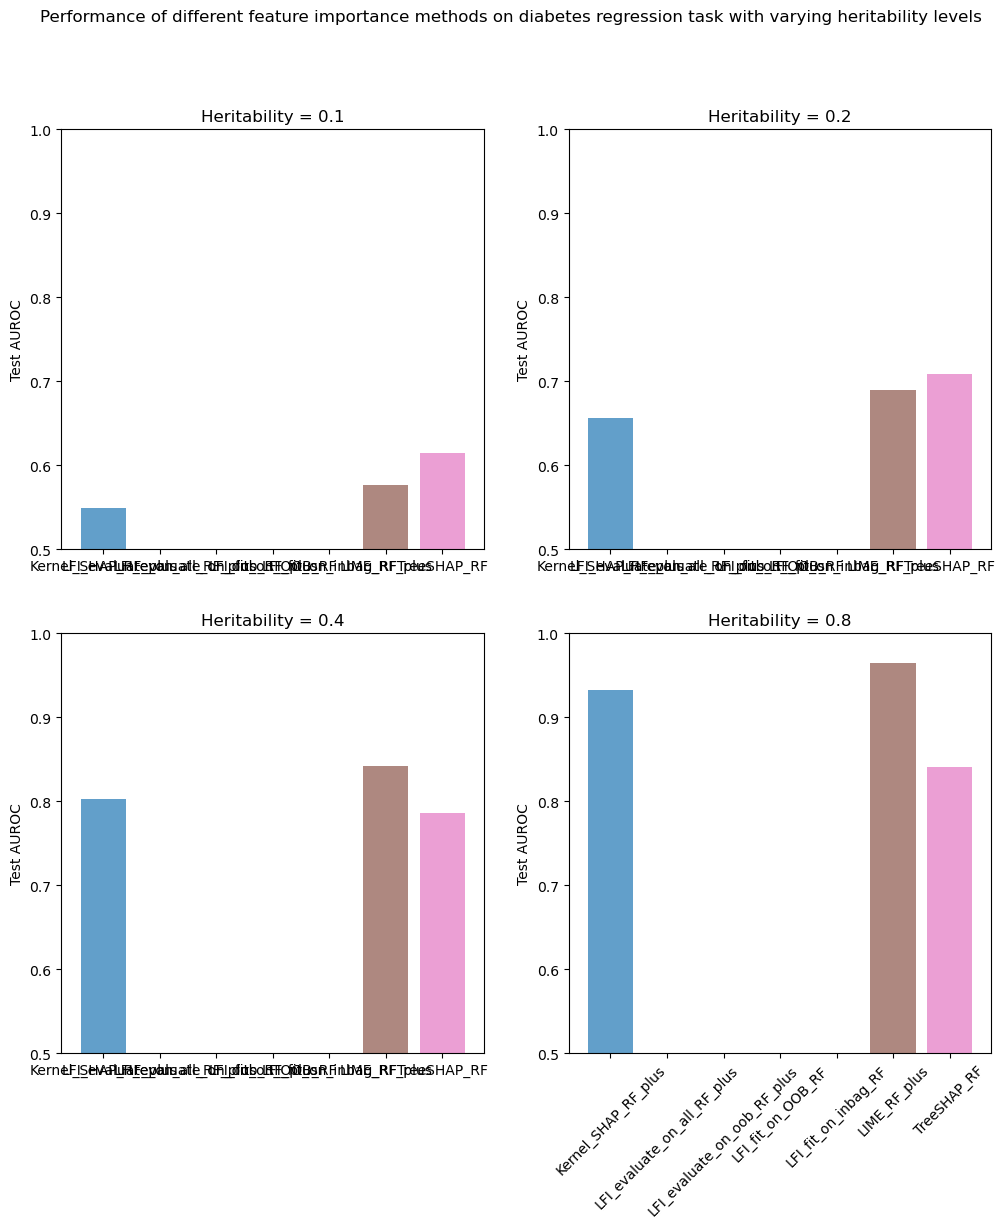

In [18]:
# create barplot with four subplots, one for each heritability level, make x axis text vertical
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Performance of different feature importance methods on diabetes regression task with varying heritability levels")
for i, h in enumerate(heritability):
    for j, m in enumerate(methods):
        axs[i//2, i%2].bar(m, agg_results[h][m]["test_auroc"][0], label=f"{m}", alpha=0.7)
        axs[i//2, i%2].set_title(f"Heritability = {h}")
        axs[i//2, i%2].set_ylabel("Test AUROC")
        axs[i//2, i%2].set_ylim(0.5, 1)
        plt.xticks(rotation=45)

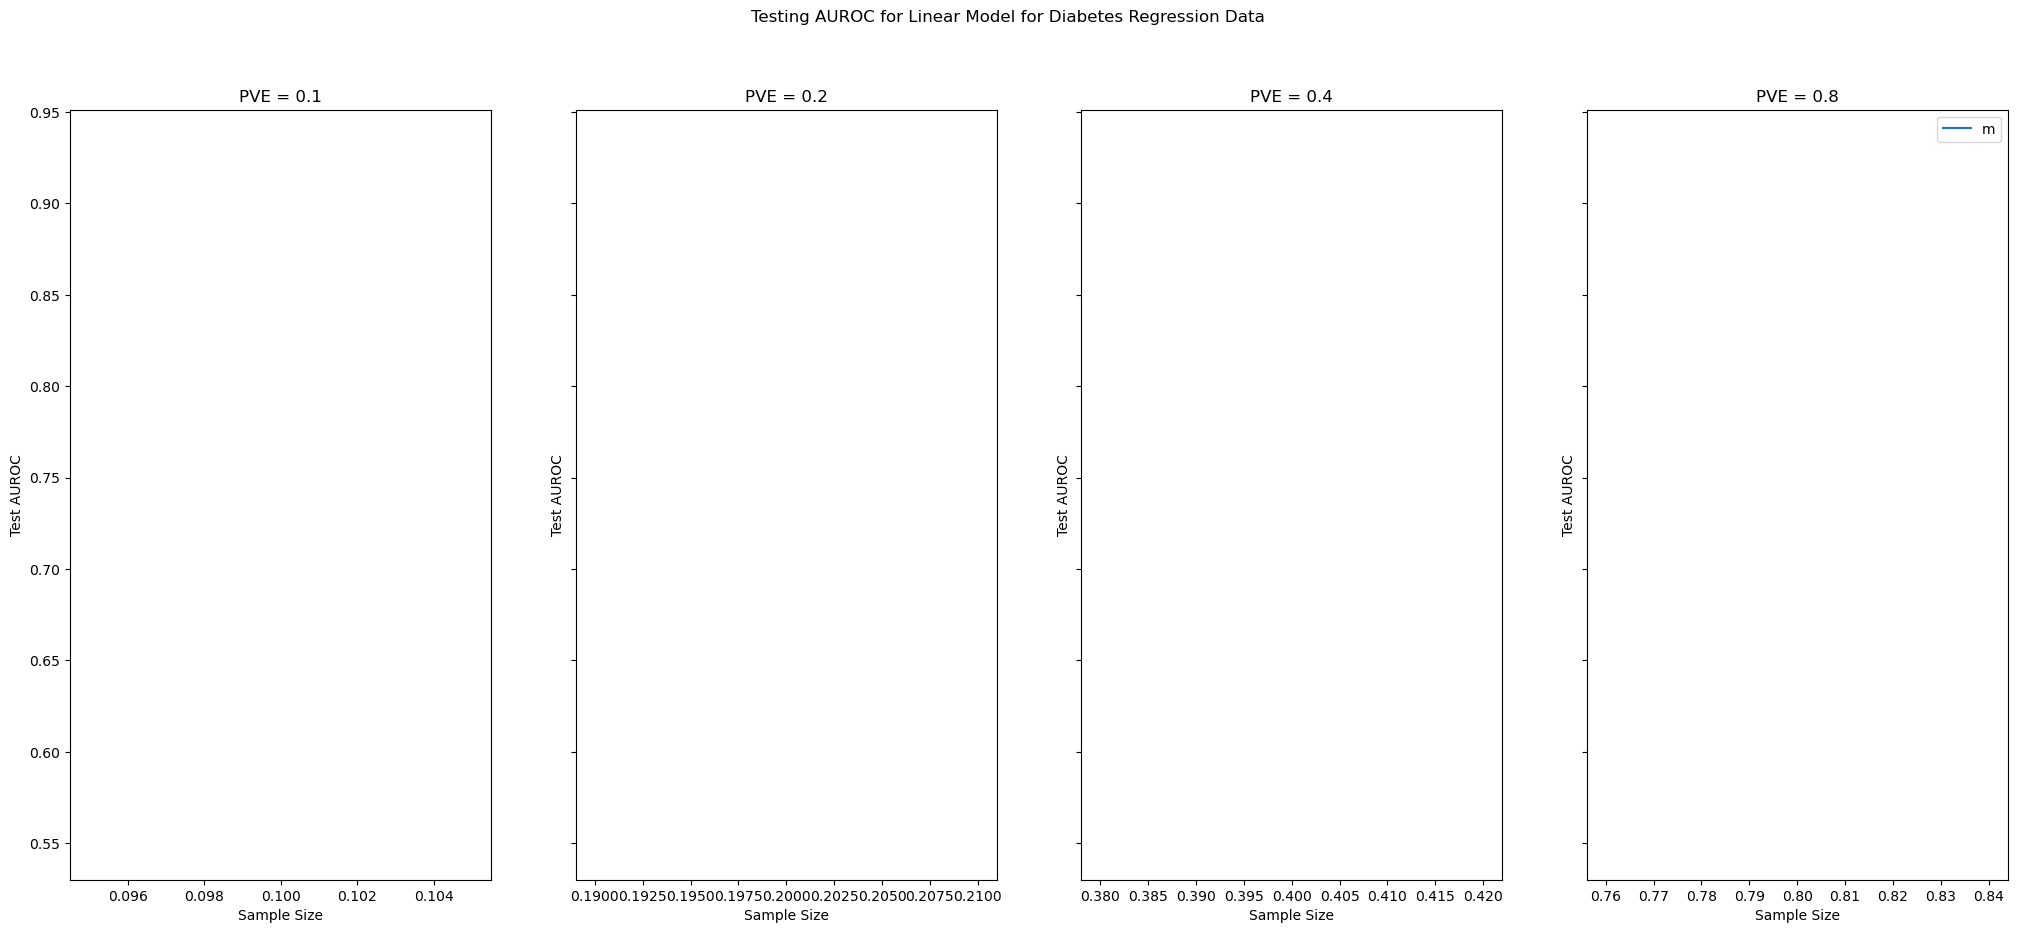

In [15]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    # for m in methods:
    #     if "RF_plus" in m:
    #         axs[i].plot(sample_row_n, agg_results[h][m]["test_auroc"], label=m, linestyle='dashed')
    #     else:
    #         axs[i].plot(sample_row_n, agg_results[h][m]["test_auroc"], label=m)
    axs[i].plot(h, agg_results[h][m]["test_auroc"], label="m")
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Test AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Testing AUROC for Linear Model for Diabetes Regression Data")

# Show the plots
plt.show()

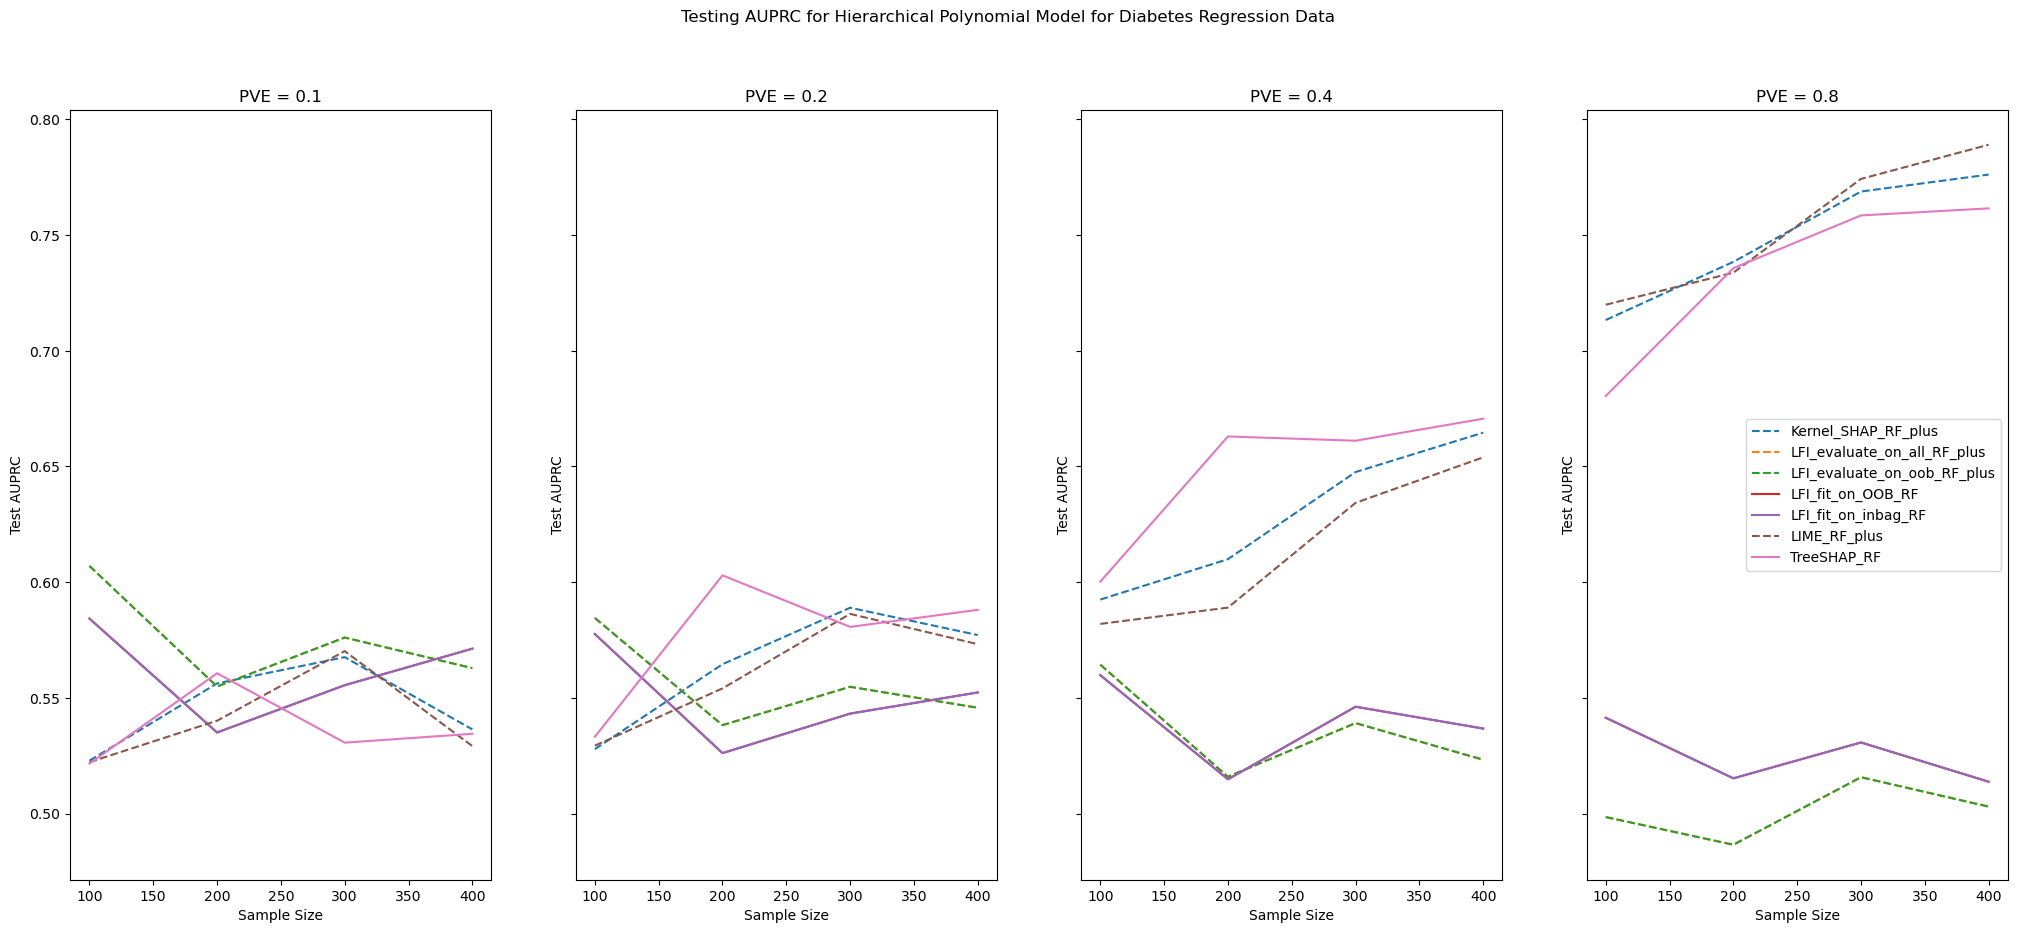

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auprc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auprc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Test AUPRC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Testing AUPRC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

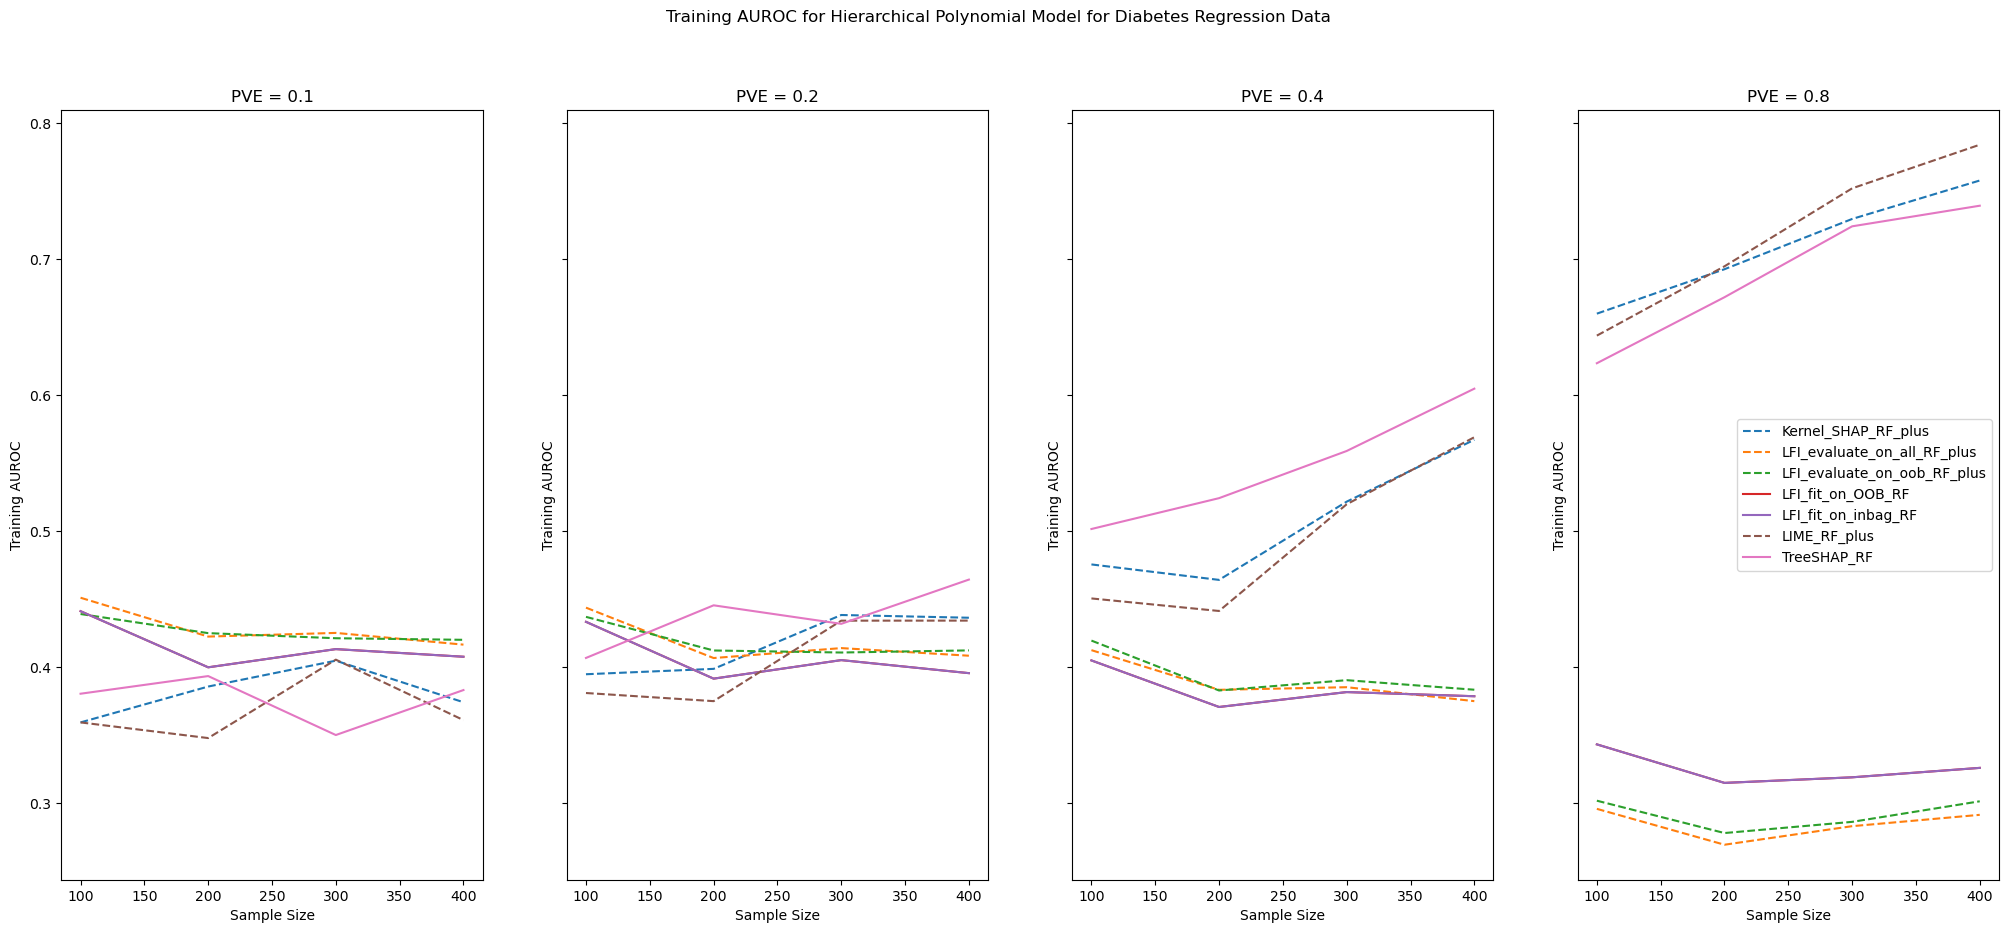

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auroc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auroc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Training AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Training AUROC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

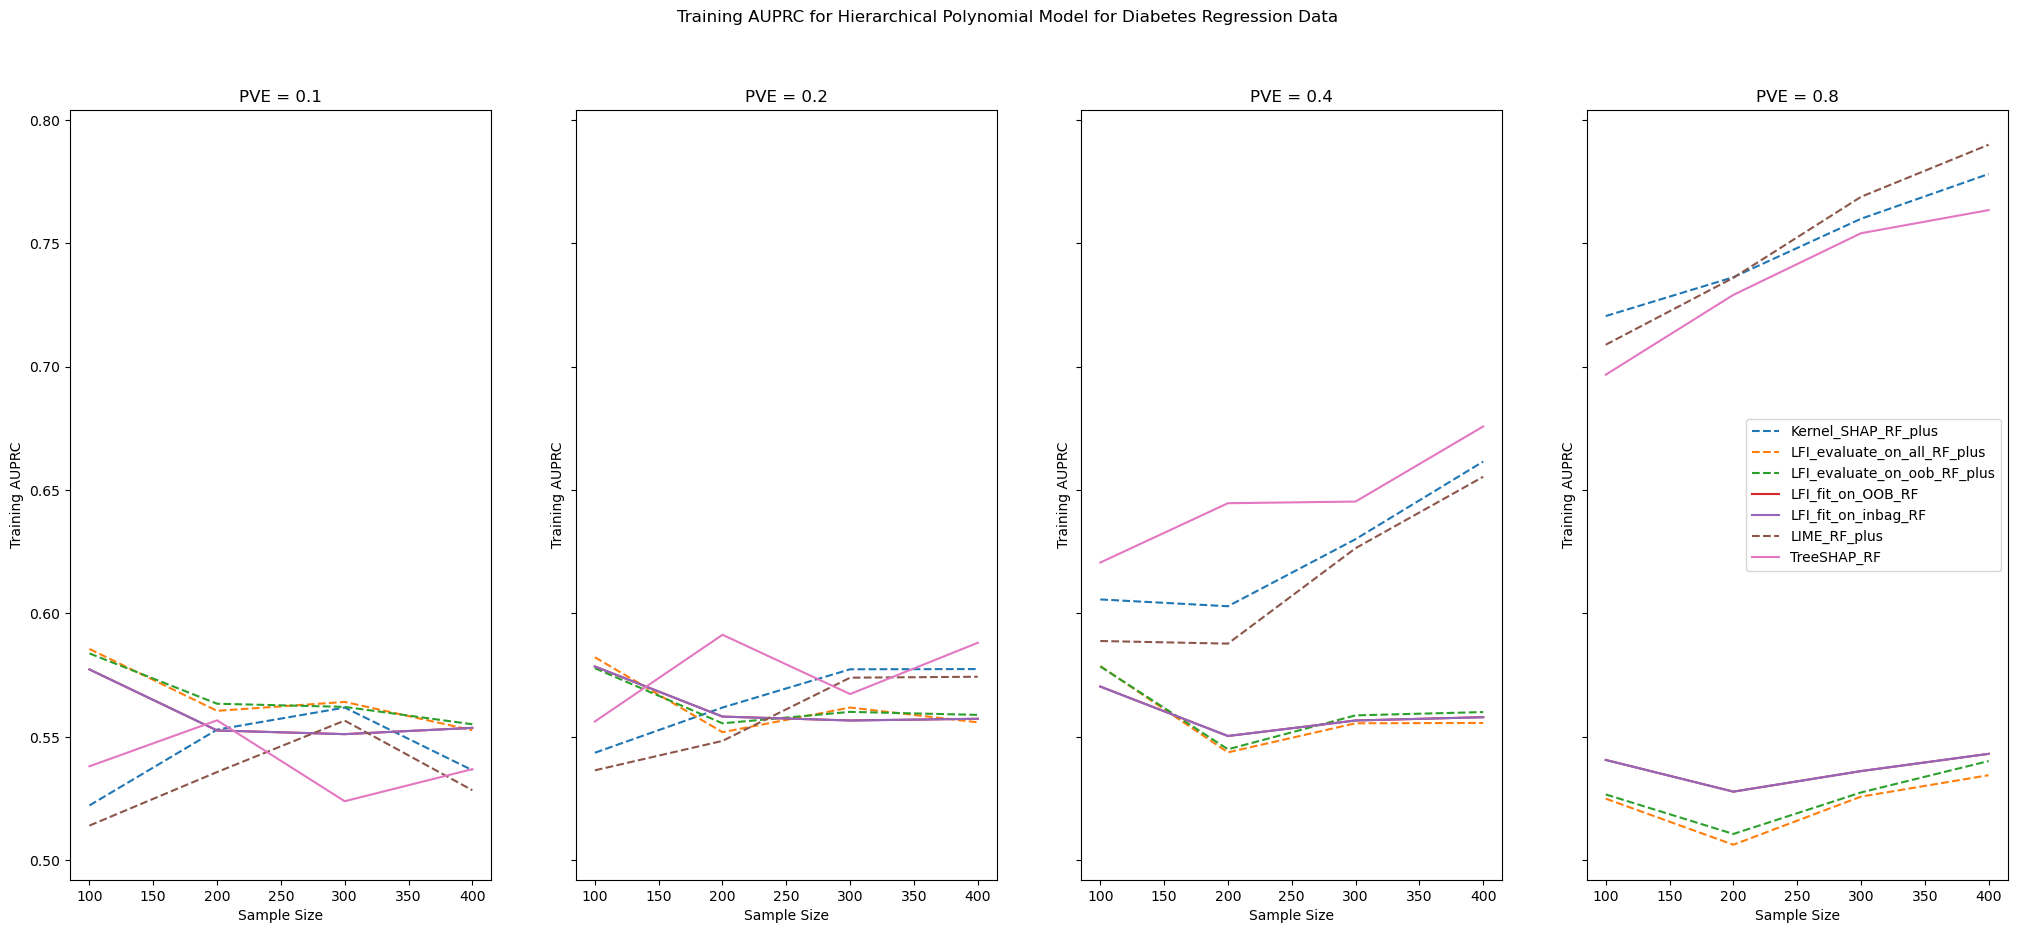

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auprc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auprc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Training AUPRC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Training AUPRC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()